In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/student_clustering.csv')
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


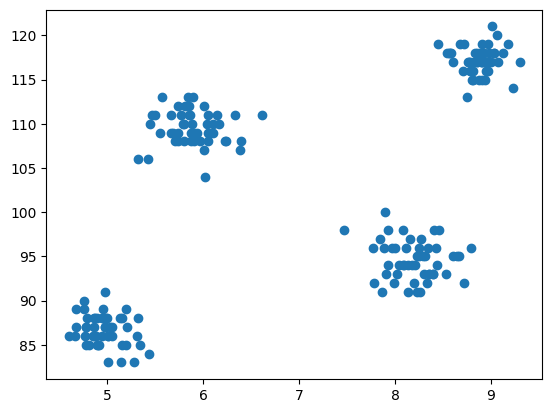

In [2]:
import matplotlib.pyplot as plt 
plt.scatter(df['cgpa'], df['iq'])

In [3]:
from sklearn.cluster import KMeans

### Elbow curve

In [7]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters= i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [8]:
wcss

[29957.898287999997,
 4184.14127,
 2364.0055834200834,
 681.96966,
 563.7685674520716,
 534.3407854162788,
 357.725165758407,
 258.97632521182265,
 206.316445212957,
 177.86030028641437]

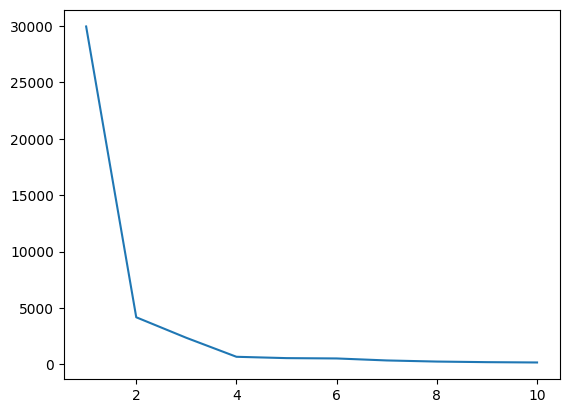

In [9]:
plt.plot(range(1,11), wcss)

In [11]:
x = df.iloc[:,:].values
km = KMeans(n_clusters= 4)
y_mean = km.fit_predict(x)
y_mean

array([2, 3, 1, 1, 3, 3, 1, 0, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 3, 0, 3, 0, 3, 1, 1, 0, 3, 2, 3, 2, 1, 1, 2,
       0, 0, 1, 3, 0, 3, 2, 2, 0, 1, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0, 2, 0,
       1, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 2, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 3, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 0, 3, 3, 1, 0, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       2, 2, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 0,
       2, 1, 3, 0, 3, 1, 2, 0, 3, 1, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3,
       3, 0], dtype=int32)

In [17]:
x[y_mean == 1,0]

array([8.36, 8.27, 8.41, 8.09, 8.16, 8.31, 7.87, 7.47, 7.78, 7.93, 8.04,
       7.77, 8.  , 8.43, 8.02, 8.14, 8.12, 8.34, 8.65, 8.53, 8.29, 7.93,
       8.72, 8.14, 8.2 , 8.67, 8.18, 8.61, 7.99, 8.08, 8.26, 8.25, 8.4 ,
       7.84, 8.08, 8.25, 8.3 , 7.9 , 7.97, 8.21, 8.23, 8.35, 8.33, 8.46,
       7.89, 7.91, 8.23, 8.4 , 8.44, 8.79])

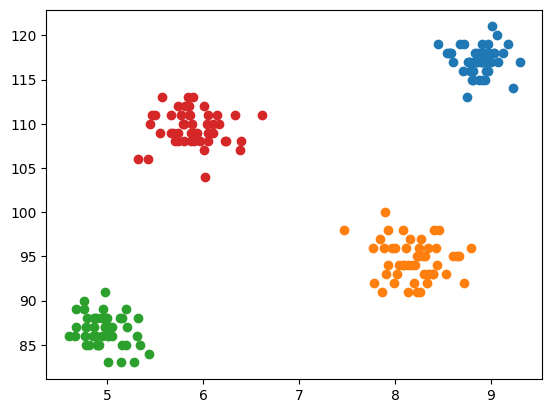

In [18]:
plt.scatter(x[y_mean == 0,0], x[y_mean == 0, 1], colorizer= 'blue')
plt.scatter(x[y_mean == 1,0], x[y_mean == 1, 1], colorizer= 'yellow')
plt.scatter(x[y_mean == 2,0], x[y_mean == 2, 1], colorizer= 'green')
plt.scatter(x[y_mean == 3,0], x[y_mean == 3, 1], colorizer= 'red')

### clustering on 3-D data

In [27]:
from sklearn.datasets import make_blobs

cen = [(-5,-5,5), (5,5,-5), (3.5,-2.5,4), (-2.5, 2.5, -4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples= 200, cluster_std= cluster_std, centers= cen, n_features= 3, random_state= 1)

In [28]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [33]:
import plotly.io as pio
pio.renderers.default = "browser"

In [34]:
import plotly.express as px
fig = px.scatter_3d(x= X[:,0], y= X[:,1], z= X[:,2])
fig.show()

In [35]:
wcss1 = []
for i in range(1,21):
    km2 = KMeans(n_clusters= i)
    km2.fit_predict(X)
    wcss1.append(km2.inertia_)

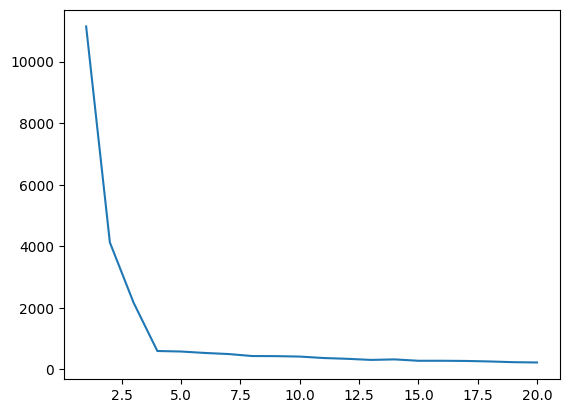

In [36]:
plt.plot(range(1,21), wcss1)

In [39]:
km2 = KMeans(n_clusters= 4)
y_pred = km2.fit_predict(X)

In [40]:
df1 = pd.DataFrame()

df1['col1'] = X[:,0]
df1['col2'] = X[:,1]
df1['col3'] = X[:,2]

df1['label'] = y_pred

In [44]:
df1['label']

0      1
1      3
2      2
3      1
4      3
      ..
195    1
196    3
197    2
198    0
199    3
Name: label, Length: 200, dtype: int32

In [46]:
fig = px.scatter_3d(df1, x= 'col1', y= 'col2', z= 'col3', color= 'label')
fig.show()